# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
# Reused from activities 4 and 5 in lab 2

MIN_ERR = 1e-8

J = np.zeros((nX, 1))
err = 1

# Based on slide 62 of lec8.pdf:
while err > MIN_ERR:
    Qs = [c[:, [i]] + gamma * P[i] @ J for i in range(nA)]
    Jnew = np.min(Qs, axis=0)
    err = np.linalg.norm(Jnew - J)
    J = Jnew

Q = np.hstack(Qs)
print(Q)

[[ 5.84607096  5.84607096  5.84607096  4.89502117]
 [11.57144785 10.67823015 11.57144785 12.45352816]
 [ 7.0200601   7.9475408   6.08086879  7.9475408 ]
 [ 4.65725873  3.69420073  5.60830851  3.69420073]
 [12.67404824 11.79196792 11.79196792 12.67404824]
 [ 8.17941097  9.09532707  7.25193028  8.17941097]
 [ 3.45343623  2.47821842  4.41649423  3.45343623]
 [11.34814342  9.55043002 10.45492572 11.34814342]
 [ 7.25193028  9.09532707  8.17941097  9.09532707]
 [ 4.41649423  4.41649423  3.45343623  2.47821842]
 [12.45352816 11.57144785 10.67823015 11.57144785]
 [ 8.40839     9.3243061   8.40839     9.3243061 ]
 [ 3.20963178  2.23441397  3.20963178  1.24688279]
 [ 0.          0.          0.98753117  0.        ]
 [ 8.40839     9.3243061   9.3243061   9.3243061 ]
 [ 3.69420073  4.65725873  4.65725873  4.65725873]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
def epsilon_greedy(Q, x, epsilon=0.1):
    if np.random.choice([0, 1], p=[epsilon, 1-epsilon]):
        return np.random.choice(np.where(Q[x] == np.min(Q[x]))[0])
    else:
        return np.random.choice(nA)

for i in range(10):
    print(epsilon_greedy(Q, 3, 0))
print("")
for i in range(10):
    print(epsilon_greedy(Q, 3, 0.5))
print("")
for i in range(10):
    print(epsilon_greedy(Q, 3, 1))

1
1
1
1
1
1
3
1
1
3

3
1
2
2
1
1
1
1
0
1

0
2
3
2
0
2
3
2
3
0


### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 5.86839853  5.86805542  5.87417117  4.92340522]
 [11.50441456 10.57540354 11.46825079 12.51370429]
 [ 7.02734813  7.98850484  6.0669197   7.90937752]
 [ 4.72403456  3.73649129  5.70451262  3.75515247]
 [12.4970573  11.67876469 11.77418395 12.49958063]
 [ 7.75330617  7.96402795  7.18376299  7.87780194]
 [ 3.65110962  2.63951099  4.31976847  3.53248828]
 [11.19823329  9.51266019 10.44838669 11.28494248]
 [ 7.2137573   9.08389536  8.14343008  9.00068757]
 [ 4.3258204   4.27002713  3.54359148  2.53860785]
 [12.33532406 11.59369497 10.66719775 11.58548631]
 [ 8.3318828   8.4014633   8.45531041  8.92390388]
 [ 3.15420182  2.25212878  3.27551295  1.2613035 ]
 [ 0.          0.          1.00875037  0.        ]
 [ 8.3744781   9.31767648  9.28230689  9.29376338]
 [ 3.68356378  4.180548    4.57902714  3.9884288 ]]


<IPython.core.display.Javascript object>


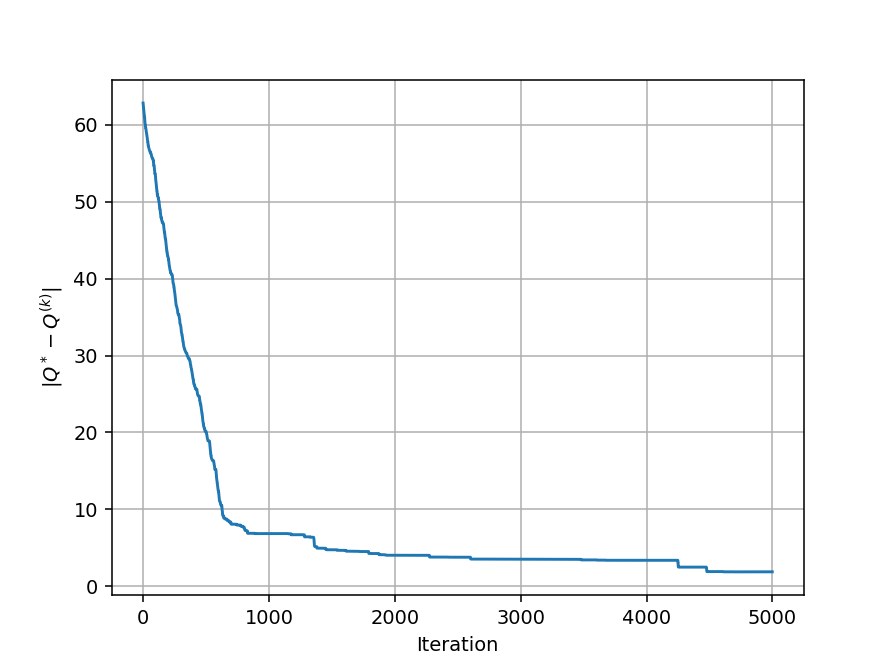

In [4]:
N_ITERATIONS = 5000
GOAL = 13

P3 = [np.eye(nX) for a in range(nA)]
c3 = np.zeros((nX, nA))
Q3 = np.zeros((nX, nA))
N3 = np.zeros((nX, nA))

def P_t1(y, x_t, a_t, x_t1, alpha):
    P3[a_t][x_t, y] = P3[a_t][x_t, y] + alpha * (int(x_t1 == y) - P3[a_t][x_t, y])
    
    # Doesn't seem to be necessary for np.random.choice
    # Also some lines get zeroed out? Would that mean a uniform distribution?
    #s = np.sum(P3[a_t][x_t])
    #if s != 0:
    #    P3[a_t][x_t] /= s
    
    return P3[a_t][x_t, y]

def c_t1(x_t, a_t, c_t, alpha):
    c3[x_t, a_t] = c3[x_t, a_t] + alpha * (c_t - c3[x_t, a_t])
    return c3[x_t, a_t]

def step_size(x_t, a_t):
    return 1/(N3[x_t, a_t] + 1)

# Slide 4 of lec21.pdf
def Q_t1(x_t, a_t, c_t, x_t1):
    alpha = step_size(x_t, a_t)
    result = c_t1(x_t, a_t, c_t, alpha)
    for y in range(nX):
        result += gamma * P_t1(y, x_t, a_t, x_t1, alpha) * np.min(Q3[y])
    return result

def reset():
    return np.random.choice((1, 4, 7, 10)) # The 4 states without a key

def plot_norm_Qstar_Q(norms):
    fig = plt.figure()
    plt.gca().grid(True)
    plt.plot(np.arange(len(norms)), norms)
    plt.xlabel("Iteration")
    plt.ylabel("$\|Q^*-Q^{(k)}\|$")
    plt.show()

def simulate(Q_activity, Q_update_function, N = None, use_a_t1 = False):
    norms = []
    x_t = reset()
    a_t = epsilon_greedy(Q_activity, x_t)
    
    for i in range(N_ITERATIONS):
        c_t = c[x_t, a_t]
        x_t1 = np.random.choice(nX, p=P[a_t][x_t])
        a_t1 = epsilon_greedy(Q_activity, x_t1)
        
        if use_a_t1:
            Q_activity[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1, a_t1)
        else:
            Q_activity[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1)
        
        if N is not None:
            N[x_t, a_t] += 1
        
        # If x_t1 is the GOAL, the extra iteration will still run as specified as x_t isn't
        if x_t == GOAL:
            x_t = reset()
            a_t = epsilon_greedy(Q_activity, x_t)
        else:
            x_t = x_t1
            a_t = a_t1
        
        norms.append(np.linalg.norm(Q - Q_activity))
    return norms

norms3 = simulate(Q3, Q_t1, N3)
print(Q3)
plot_norm_Qstar_Q(norms3)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

[[ 5.53290736  5.54741363  5.59088167  5.12819257]
 [11.22667718 10.21066668 11.12118291 11.67121356]
 [ 6.57508687  7.22929995  5.67481641  7.33433835]
 [ 4.57075944  3.87260429  5.3781111   4.03836557]
 [11.8099163  11.51024498 11.30234182 11.79624471]
 [ 6.76920136  6.82671961  6.73318566  6.90149077]
 [ 3.40907441  2.72663816  3.81424428  3.36901001]
 [10.4381417   9.12276278 10.05152241 10.37867601]
 [ 6.69008787  8.17542958  7.82039405  7.89184535]
 [ 4.15582396  3.83185888  3.16053614  2.68754806]
 [11.13414003 10.81594832 10.08791038 10.83053962]
 [ 7.38012378  7.56648556  7.5081628   7.38479362]
 [ 2.84599603  2.43832136  3.23714396  1.31188274]
 [ 0.          0.          0.75900034  0.        ]
 [ 8.0489644   8.93003667  9.19927173  9.23125268]
 [ 3.32161937  3.55477608  3.48756891  3.90998472]]


<IPython.core.display.Javascript object>


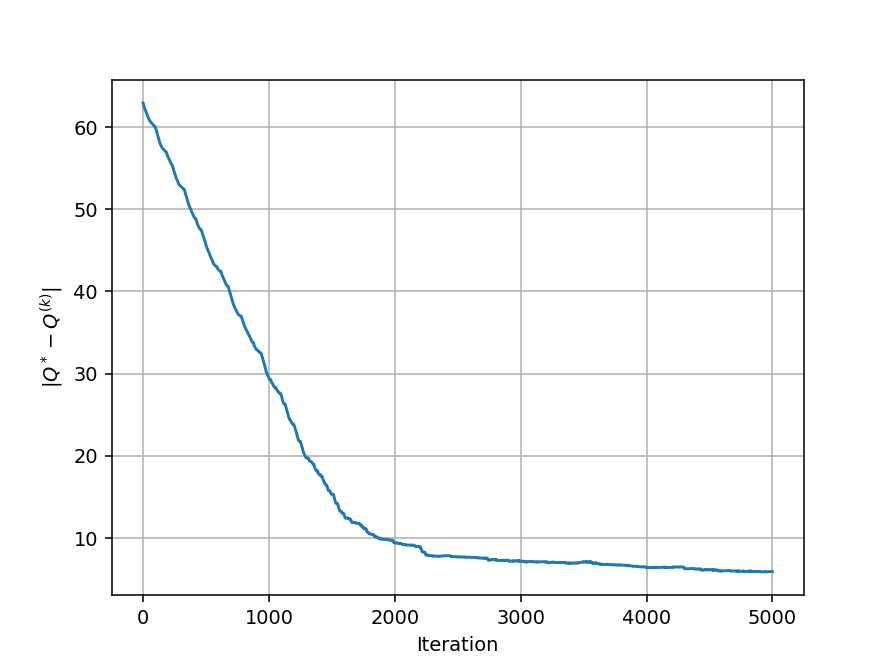

In [5]:
Q4 = np.zeros((nX, nA))

# Slide 15 of lec21.pdf
def Q_learning_update(x_t, a_t, c_t, x_t1, alpha = 0.3):
    return Q4[x_t, a_t] + alpha * (c_t + gamma * np.min(Q4[x_t1]) - Q4[x_t, a_t])

norms4 = simulate(Q4, Q_learning_update)
print(Q4)
plot_norm_Qstar_Q(norms4)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 6.56585957  6.55742948  6.80334409  5.2088932 ]
 [12.25596976 11.30898545 12.51677331 11.86313636]
 [ 7.66195779  8.27417993  6.6040146   8.18363482]
 [ 5.00557715  5.39890933  6.43525001  4.02892773]
 [12.9460991  12.25650936 12.8735367  13.03390084]
 [ 7.86208436  7.57769367  7.63055411  7.67722255]
 [ 4.32059467  2.40782323  4.9534686   4.03506119]
 [11.72623438  9.99188221 11.01988742 11.34740901]
 [ 7.45955815  9.1711784   8.83296411  9.04448661]
 [ 4.98310998  5.15844623  3.82598585  2.91219196]
 [12.456968   11.60091173 11.32225894 11.64803085]
 [ 8.05375824  8.19960228  7.97723186  7.96787613]
 [ 3.19812549  2.41405983  3.71827521  1.29183707]
 [ 0.16043873  0.12996259  1.55265499  0.16008932]
 [ 8.71957731 10.48752637 10.71778157 10.33268544]
 [ 4.1243593   5.20198353  4.89655818  5.09212239]]


<IPython.core.display.Javascript object>


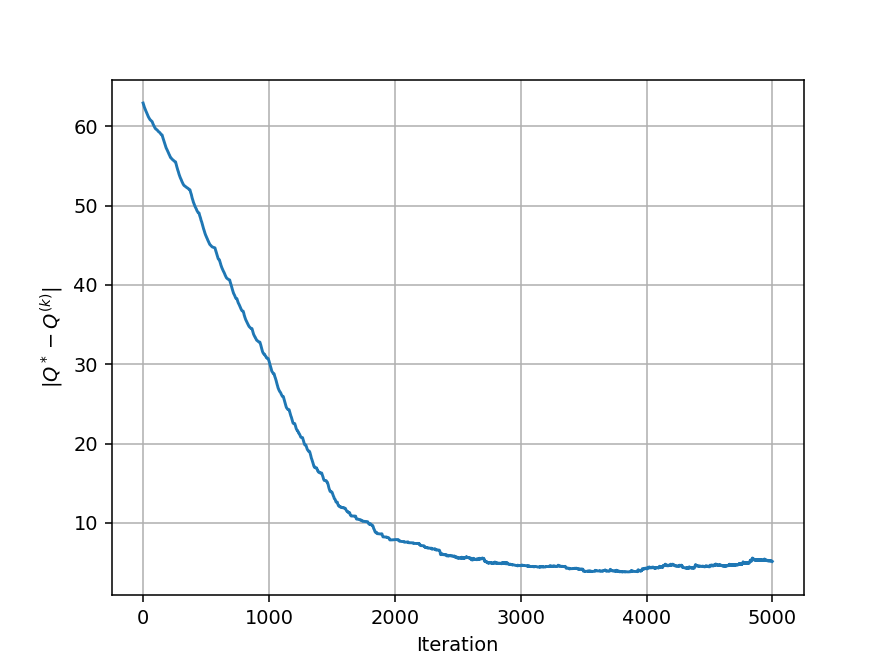

In [6]:
Q5 = np.zeros((nX, nA))

# Slide 32 of lec21.pdf
def SARSA_update(x_t, a_t, c_t, x_t1, a_t1, alpha = 0.3):
    return Q5[x_t, a_t] + alpha * (c_t + gamma * Q5[x_t1, a_t1] - Q5[x_t, a_t])

norms5 = simulate(Q5, SARSA_update, use_a_t1 = True)
print(Q5)
plot_norm_Qstar_Q(norms5)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

Insert your comments here.